<a href="https://colab.research.google.com/github/aaq2000/PythonAI/blob/main/Aakif_Qidwai_Laddb_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab #4**

**First and Last Name: Aakif Qidwai**

**Student ID: 500916258**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

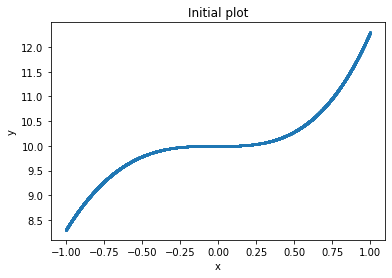

In [ ]:
def generate_samples(n_samples):
    x = np.random.uniform(-1, 1, n_samples)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    return x, y

x, y = generate_samples(30000)

plt.scatter(x, y, s=1)
plt.title("Initial plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
def get_dataset(shuffle=True):
    x = np.random.uniform(-1, 1, 30000)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    data = np.vstack((x, y)).T

    if shuffle:
        np.random.shuffle(data)
    return data

data_shuffled = get_dataset(shuffle=True)
data_unshuffled = get_dataset(shuffle=False)

In [ ]:
def train_val_test_split(data, train_ratio=0.30, val_ratio=0.20, test_ratio=0.50):

    n_samples = len(data)
    n_train = int(n_samples * train_ratio)
    n_val = int(n_samples * val_ratio)
    n_test = n_samples - n_train - n_val

    # train, validation, and test sets
    train_set = data[:n_train]
    val_set = data[n_train:n_train+n_val]
    test_set = data[n_train+n_val:]

    return train_set, val_set, test_set

In [ ]:
data = np.vstack((x, y)).T

def scale_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

scaled_data = scale_data(data)


In [ ]:
def evaluate_predictions(y_test, y_pred):
    # mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # root mean squared error
    rmse = np.sqrt(mse)

    # r2 score
    r2 = r2_score(y_test, y_pred)

    return mae, mse, rmse, r2

**Neural network of 2 structures**

In [ ]:
# Structure 1
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Structure 2
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

`**Case 1 - Shuffled:**

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 30.6584 - val_loss: 0.2497
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1337 - val_loss: 0.0759
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0533 - val_loss: 0.0437
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0433 - val_loss: 0.0434
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0433 - val_loss: 0.0430
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0437 - val_loss: 0.0446
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0441 - val_loss: 0.0437
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0440 - val_loss: 0.0519
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0443 - val_loss: 0.0457
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0445 - val_loss: 0.043

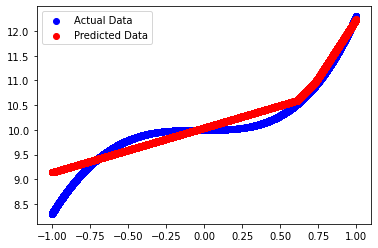

In [ ]:
def function(x):
    return 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
X = np.random.uniform(-1, 1, size=(30000,))
y = function(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=12, validation_data=(X_val, y_val))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.legend()
plt.show()

**Case 1 - Unshuffled:**

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 94.7637 - val_loss: 87.5838
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 81.1960 - val_loss: 74.7605
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 69.0221 - val_loss: 63.2380
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 58.0898 - val_loss: 52.9027
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 48.2945 - val_loss: 43.6577
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 39.5622 - val_loss: 35.4514
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 31.8418 - val_loss: 28.2315
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 25.0903 - val_loss: 21.9624
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 19.2719 - val_loss: 16.6113
Epoch 10/20
750/750 [==============================] - 3s 4ms/step - loss: 14.3527

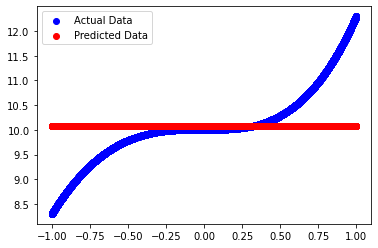

In [ ]:
def function(x):
    return 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

X = np.random.uniform(-1, 1, size=(30000,))
y = function(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, shuffle=False, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=12, validation_data=(X_val, y_val))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.legend()
plt.show()

**Case 2 - Shuffled:**

Epoch 1/20
750/750 [==============================] - 7s 4ms/step - loss: 37.8024 - val_loss: 0.2070
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1062 - val_loss: 0.0967
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0837 - val_loss: 0.0803
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0708 - val_loss: 0.0690
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0616 - val_loss: 0.0598
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0530 - val_loss: 0.0503
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0417 - val_loss: 0.0369
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0277 - val_loss: 0.0224
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0157 - val_loss: 0.0133
Epoch 10/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.007

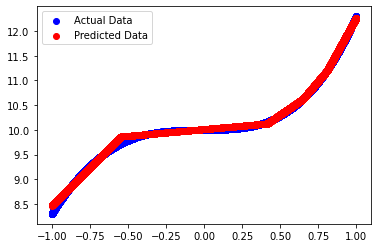

In [ ]:
def function(x):
    return 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

X = np.random.uniform(-1, 1, size=(30000,))
y = function(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mse')

history = model2.fit(X_train, y_train, epochs=20, batch_size=12, validation_data=(X_val, y_val))

y_pred = model2.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.legend()
plt.show()

**Case 2 - Unshuffled:**

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 44.6226 - val_loss: 0.9176
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1626 - val_loss: 0.1053
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0999 - val_loss: 0.1005
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0957 - val_loss: 0.0974
Epoch 5/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0932 - val_loss: 0.0954
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0921 - val_loss: 0.0950
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0914 - val_loss: 0.0940
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0903 - val_loss: 0.0926
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0890 - val_loss: 0.0921
Epoch 10/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0875 - val_loss: 0.091

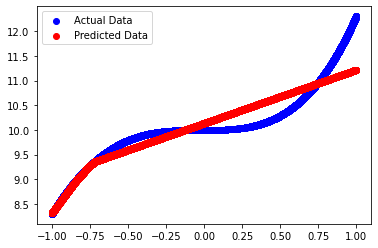

In [ ]:
def function(x):
    return 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

X = np.random.uniform(-1, 1, size=(30000,))
y = function(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, shuffle=False, random_state=42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=24, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model4.compile(optimizer='adam', loss='mse')

history = model4.fit(X_train, y_train, epochs=20, batch_size=12, validation_data=(X_val, y_val))

y_pred = model4.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.legend()
plt.show()

**Case 3 - Shuffled:**

Epoch 1/20
750/750 [==============================] - 6s 5ms/step - loss: 37.2688 - val_loss: 14.7833
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 7.4073 - val_loss: 2.9067
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.4396 - val_loss: 0.7685
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.6215 - val_loss: 0.5942
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3634 - val_loss: 0.2762
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2242 - val_loss: 0.2006
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1545 - val_loss: 0.1123
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0612 - val_loss: 0.0354
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0200 - val_loss: 0.0126
Epoch 10/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0077 - val_loss: 0.00

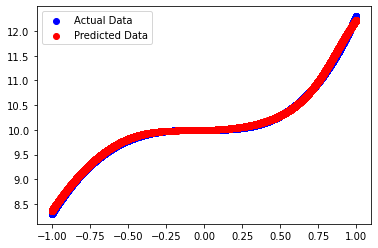

In [ ]:
def function(x):
    return 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

X = np.random.uniform(-1, 1, size=(30000,))
y = function(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=12, validation_data=(X_val, y_val))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.legend()
plt.show()

**Case 3 - Unshuffled:**

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 39.5515 - val_loss: 17.1671
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 8.9650 - val_loss: 3.6384
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 1.8096 - val_loss: 0.8506
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.6628 - val_loss: 0.5971
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5461 - val_loss: 0.3337
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2782 - val_loss: 0.2333
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2019 - val_loss: 0.1818
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1666 - val_loss: 0.1561
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1472 - val_loss: 0.1404
Epoch 10/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1322 - val_loss: 0.12

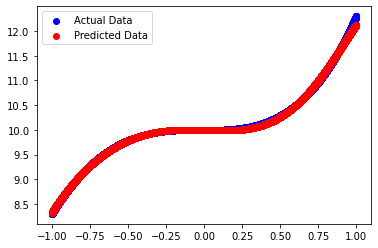

In [ ]:
def function(x):
    return 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

X = np.random.uniform(-1, 1, size=(30000,))
y = function(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, shuffle=False, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=12, validation_data=(X_val, y_val))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.legend()
plt.show()

**Case 4 - Shuffled:**

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0119 - val_loss: 0.0063
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0062 - val_loss: 0.0065
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0062 - val_loss: 0.0064
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0063 - val_loss: 0.0063

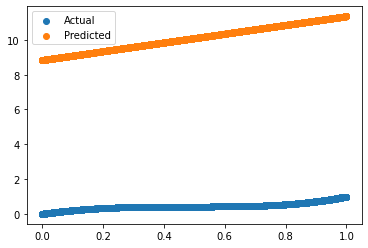

MAE: 9.654655473684429
MSE: 93.52642401101937
RMSE: 9.670906059466164
R2 Score: -2580.4641922806245


In [ ]:
x = np.linspace(-1, 1, 30000)
y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
data = np.column_stack((x, y))

np.random.shuffle(data)

train_data, test_data = train_test_split(data, test_size=0.5, shuffle=False)
train_data, val_data = train_test_split(train_data, test_size=0.4, shuffle=False)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
train_data[:, 0:1] = x_scaler.fit_transform(train_data[:, 0:1])
train_data[:, 1:2] = y_scaler.fit_transform(train_data[:, 1:2])
val_data[:, 0:1] = x_scaler.transform(val_data[:, 0:1])
val_data[:, 1:2] = y_scaler.transform(val_data[:, 1:2])
test_data[:, 0:1] = x_scaler.transform(test_data[:, 0:1])
test_data[:, 1:2] = y_scaler.transform(test_data[:, 1:2])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')

history = model.fit(train_data[:, 0:1], train_data[:, 1:2], epochs=20, batch_size=12, validation_data=(val_data[:, 0:1], val_data[:, 1:2]))

y_pred = y_scaler.inverse_transform(model.predict(test_data[:, 0:1]))

mae = mean_absolute_error(test_data[:, 1:2], y_pred)
mse = mean_squared_error(test_data[:, 1:2], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[:, 1:2], y_pred)

plt.scatter(test_data[:, 0], test_data[:, 1], label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.legend()
plt.show()

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

**Case 4 - Unshuffled:**

Epoch 1/20
1250/1250 [==============================] - 12s 6ms/step - loss: 0.1792 - val_loss: 0.0544
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1500e-04 - val_loss: 0.1024
Epoch 3/20
1250/1250 [==============================] - 12s 10ms/step - loss: 4.3019e-05 - val_loss: 0.1243
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 3.7785e-05 - val_loss: 0.1369
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 3.5967e-05 - val_loss: 0.1362
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 3.6657e-05 - val_loss: 0.1354
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 3.0582e-05 - val_loss: 0.1471
Epoch 8/20
1250/1250 [==============================] - 4s 3ms/step - loss: 3.7417e-05 - val_loss: 0.1446
Epoch 9/20
1250/1250 [==============================] - 4s 3ms/step - loss: 3.8381e-05 - val_loss: 0.1403
Epoch 10/20
1250/1250 [========================

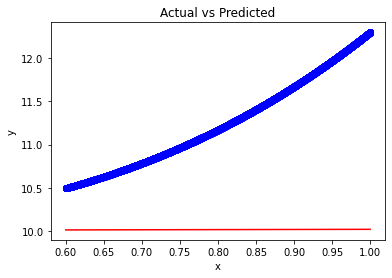

MAE: 2.5385214839808383
MSE: 7.590710497582063
RMSE: 2.7551244069156047
R^2: -5.570221701792189


In [ ]:
def func(x):
    return 0.2*x**4 + 2*x**3 + 0.1*x**2 + 10

x = np.linspace(-1, 1, 30000)
y = func(x)

x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.5, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.4, shuffle=False)

scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train.reshape(-1, 1))
x_val = scaler_x.transform(x_val.reshape(-1, 1))
x_test = scaler_x.transform(x_test.reshape(-1, 1))

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, batch_size=12, epochs=20, validation_data=(x_val, y_val))

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

x_test = scaler_x.inverse_transform(x_test)
y_test = scaler_y.inverse_transform(y_test)
y_pred = scaler_y.inverse_transform(y_pred)

plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R^2:', r2)

**Case 5 - Shuffled:**

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - val_loss: 0.0074
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 8.9328e-04 - val_loss: 5.3498e-04
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 4.7684e-04 - val_loss: 4.1594e-04
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 4.0938e-04 - val_loss: 3.7259e-04
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 3.4461e-04 - val_loss: 2.5922e-04
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 2.7487e-04 - val_loss: 2.6044e-04
Epoch 10/20
750/750 [==============================] - 2s 3m

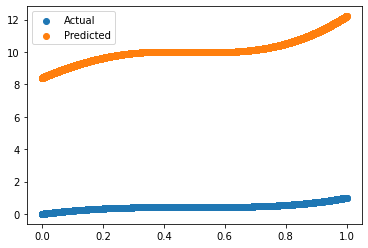

MAE: 9.64329986095361
MSE: 93.30848930312007
RMSE: 9.659631944495612
R2 Score: -2559.8464147003847


In [ ]:
x = np.linspace(-1, 1, 30000)
y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
data = np.column_stack((x, y))

np.random.shuffle(data)

train_data, test_data = train_test_split(data, test_size=0.5, shuffle=False)
train_data, val_data = train_test_split(train_data, test_size=0.4, shuffle=False)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
train_data[:, 0:1] = x_scaler.fit_transform(train_data[:, 0:1])
train_data[:, 1:2] = y_scaler.fit_transform(train_data[:, 1:2])
val_data[:, 0:1] = x_scaler.transform(val_data[:, 0:1])
val_data[:, 1:2] = y_scaler.transform(val_data[:, 1:2])
test_data[:, 0:1] = x_scaler.transform(test_data[:, 0:1])
test_data[:, 1:2] = y_scaler.transform(test_data[:, 1:2])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')

history = model.fit(train_data[:, 0:1], train_data[:, 1:2], epochs=20, batch_size=12, validation_data=(val_data[:, 0:1], val_data[:, 1:2]))

y_pred = y_scaler.inverse_transform(model.predict(test_data[:, 0:1]))

mae = mean_absolute_error(test_data[:, 1:2], y_pred)
mse = mean_squared_error(test_data[:, 1:2], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[:, 1:2], y_pred)

plt.scatter(test_data[:, 0], test_data[:, 1], label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.legend()
plt.show()

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

**Case 5 - Unshuffled:**

Epoch 1/20
1250/1250 [==============================] - 5s 3ms/step - loss: 0.0880 - val_loss: 0.0453
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0033 - val_loss: 0.0626
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 6.7914e-04 - val_loss: 0.0948
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.9337e-04 - val_loss: 0.1110
Epoch 5/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8128e-04 - val_loss: 0.1239
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0278e-04 - val_loss: 0.1326
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 5.7385e-05 - val_loss: 0.1474
Epoch 8/20
1250/1250 [==============================] - 4s 3ms/step - loss: 3.4386e-05 - val_loss: 0.1609
Epoch 9/20
1250/1250 [==============================] - 5s 4ms/step - loss: 3.1262e-05 - val_loss: 0.1641
Epoch 10/20
1250/1250 [==============================]

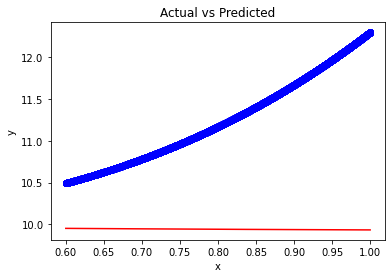

MAE: 2.688989894035681
MSE: 8.409199570678377
RMSE: 2.8998619916607025
R^2: -6.278673785750622


In [ ]:
def func(x):
    return 0.2*x**4 + 2*x**3 + 0.1*x**2 + 10

x = np.linspace(-1, 1, 30000)
y = func(x)

x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.5, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.4, shuffle=False)

scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train.reshape(-1, 1))
x_val = scaler_x.transform(x_val.reshape(-1, 1))
x_test = scaler_x.transform(x_test.reshape(-1, 1))

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, batch_size=12, epochs=20, validation_data=(x_val, y_val))

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

x_test = scaler_x.inverse_transform(x_test)
y_test = scaler_y.inverse_transform(y_test)
y_pred = scaler_y.inverse_transform(y_pred)

plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R^2:', r2)

**Q6: XOR problem using neural network**

In [ ]:
input_size = 2
hidden_size = 2
output_size = 1

w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_crossentropy(y_true, y_pred):
    epsilon = 1e-7
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def train(X, y, learning_rate, num_epochs):
    global w1, b1, w2, b2
    for epoch in range(num_epochs):
        hidden_layer = relu(np.dot(X, w1) + b1)
        output_layer = sigmoid(np.dot(hidden_layer, w2) + b2)

        loss = binary_crossentropy(y, output_layer)

        dloss_doutput = (output_layer - y) / (output_layer * (1 - output_layer))
        doutput_dz2 = output_layer * (1 - output_layer)
        dz2_dhidden = w2.T
        dhidden_dz1 = np.where(hidden_layer > 0, 1, 0)

        dw2 = np.dot(hidden_layer.T, dloss_doutput * doutput_dz2)
        db2 = np.sum(dloss_doutput * doutput_dz2, axis=0, keepdims=True)
        dw1 = np.dot(X.T, np.dot(dloss_doutput * doutput_dz2, dz2_dhidden) * dhidden_dz1)
        db1 = np.sum(np.dot(dloss_doutput * doutput_dz2, dz2_dhidden) * dhidden_dz1, axis=0, keepdims=True)

        w2 -= learning_rate * dw2
        b2 -= learning_rate * db2
        w1 -= learning_rate * dw1
        b1 -= learning_rate * db1

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

def predict(X):
    hidden_layer = relu(np.dot(X, w1) + b1)
    output_layer = sigmoid(np.dot(hidden_layer, w2) + b2)
    return np.round(output_layer)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

train(X, y, learning_rate=0.1, num_epochs=1000)

print(predict(np.array([[0, 0], [0, 1], [1, 0], [1,1]])))

Epoch 0: Loss = 0.7101
Epoch 100: Loss = 0.4884
Epoch 200: Loss = 0.4800
Epoch 300: Loss = 0.4789
Epoch 400: Loss = 0.4783
Epoch 500: Loss = 0.4780
Epoch 600: Loss = 0.4780
Epoch 700: Loss = 0.4779
Epoch 800: Loss = 0.4777
Epoch 900: Loss = 0.4778
[[0.]
 [0.]
 [1.]
 [0.]]
